This iPython notebook shows results from a hydrograph separation analysis done by Jason M. Fine using the USGS program Groundwater Toolbox (http://water.usgs.gov/ogw/gwtoolbox/). The original analysis includes gaging stations from the GAGESII and HCDN networks based on suggestions from Paul Barlow. The gaging stations included herein are those located in the Tampa Bay HUC6 accounting unit (031002).

This notebook is organized into codeblocks and output. The first codeblock imports the Python libraries needed to run this analysis. The second codeblock reads in the list of gaging stations in the Tampa Bay HUC6 as well as the results of the original hydrograph separation analysis. The output from this codeblock is a list of the gaging stations in the Tampa Bay HUC6 for which baseflow estimates were made. The third codeblock plots baseflow as a percent of total streamflow as computed by each hydrograph separation method for each gaging station. The fourth codeblock plots the same in terms of inches per year. The last codeblock provides some summary statistics for each hydrograph separation method for all sites as well as categories of sites based on the degree of confinement of the underlying Floridan aquifer system.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
from collections import OrderedDict
matplotlib.style.use('ggplot')

In [2]:
# Import the list of sites located in the Tampa Bay HUC6 accounting unit (031002)
tbsites_df = pd.read_csv(r'..\gis\TampaBayGagesIISites.txt')
tbsites_df['site_no'] = tbsites_df['site_no'].map('{:08}'.format)
tbsites_df = tbsites_df.set_index(['site_no'])

# Load hydrograph separation results
df = pd.read_excel(r'Floridan_hydrosep.xls', skiprows=4)
df['STAID'] = df['STAID'].map('{:08}'.format)
df = df[df['STAID']!='02314500']
df = df.set_index(['STAID'])

# Filter results by the list of Tampa Bay sites
df = df.ix[tbsites_df.index]

# Drop sites that do not have any computed baseflow stats
df = df.dropna(axis=0, how='any', subset=['STANAME'])
print(df[['STANAME']])

# Populate some variables for use later on
sites = df[['STANAME', 'DRAIN_SQKM', 'LAT_GAGE', 'LNG_GAGE', 'STATE', 'grid_code', 'Type']]
part = df[[x for x in df.columns.tolist() if x.startswith('P', 0, 1)]]
hysepfix = df[[x for x in df.columns.tolist() if x.startswith('HF', 0, 2)]]
hyseplm = df[[x for x in df.columns.tolist() if x.startswith('HLM', 0, 3)]]
hyseps = df[[x for x in df.columns.tolist() if x.startswith('HS', 0, 2)]]
bfi = df[[x for x in df.columns.tolist() if x.startswith('BS', 0, 2)]]
bfim = df[[x for x in df.columns.tolist() if x.startswith('BM', 0, 2)]]



                                                    STANAME
site_no                                                    
02299950                  MANATEE RIVER NEAR MYAKKA HEAD FL
02300100          LITTLE MANATEE RIVER NEAR FT. LONESOME FL
02300210    SOUTH FORK LITTLE MANATEE RIVER NEAR PARRISH FL
02300500               LITTLE MANATEE RIVER NEAR WIMAUMA FL
02300700                     BULLFROG CREEK NEAR WIMAUMA FL
02301000           NORTH PRONG ALAFIA RIVER AT KEYSVILLE FL
02301300            SOUTH PRONG ALAFIA RIVER NEAR LITHIA FL
02301500                          ALAFIA RIVER AT LITHIA FL
02301750                        DELANEY CREEK NEAR TAMPA FL
02301800                          SIXMILE CREEK AT TAMPA FL
02301900                         FOX BRANCH NEAR SOCRUM, FL
02301990  HILLSBOROUGH R AB CRYSTAL SPR NEAR ZEPHYRHILLS FL
02302500                   BLACKWATER CREEK NEAR KNIGHTS FL
02303000             HILLSBOROUGH RIVER NEAR ZEPHYRHILLS FL
02303205       BAKER CREEK AT MCINTOSH R

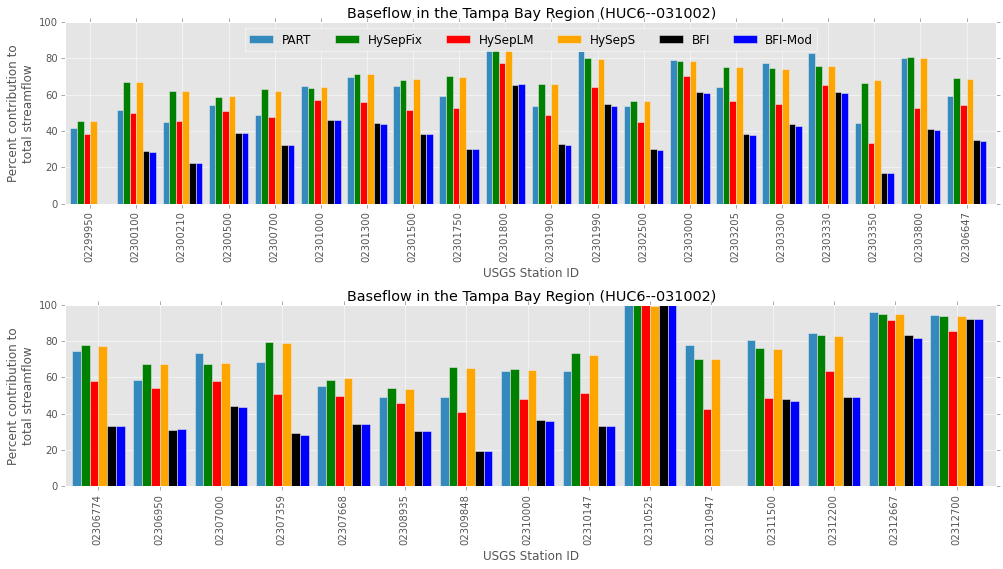

In [3]:
part_pct = part[[x for x in part.columns.tolist() if '%' in x][0]]
hysepfix_pct = hysepfix[[x for x in hysepfix.columns.tolist() if '%' in x][0]]
hyseplm_pct = hyseplm[[x for x in hyseplm.columns.tolist() if '%' in x][0]]
hyseps_pct = hyseps[[x for x in hyseps.columns.tolist() if '%' in x][0]]
bfi_pct = bfi[[x for x in bfi.columns.tolist() if '%' in x][0]]
bfim_pct = bfim[[x for x in bfim.columns.tolist() if '%' in x][0]]

nfigs = int(math.floor(len(df)/20.))+1
fig, axes = plt.subplots(nfigs, figsize=(14, 4*nfigs))
bar_width = 1/7.

i = 0
for idx, ax in enumerate(axes):
    x_pos = np.arange(0, len(df[i:i+20]))
    plt.sca(ax)
    plt.bar(x_pos-(bar_width)*2, part_pct[i:i+20], bar_width, label='PART')
    plt.bar(x_pos-(bar_width), hysepfix_pct[i:i+20], bar_width, label='HySepFix', color='g')
    plt.bar(x_pos, hyseplm_pct[i:i+20], bar_width, label='HySepLM', color='r')
    plt.bar(x_pos+(bar_width), hyseps_pct[i:i+20], bar_width, label='HySepS', color='orange')
    plt.bar(x_pos+(bar_width)*2, bfi_pct[i:i+20], bar_width, label='BFI', color='black')
    plt.bar(x_pos+(bar_width)*3, bfim_pct[i:i+20], bar_width, label='BFI-Mod', color='blue')

    plt.xlabel('USGS Station ID')
    plt.ylabel('Percent contribution to\ntotal streamflow')
    plt.title('Baseflow in the Tampa Bay Region (HUC6--031002)')
    locs, labels = plt.xticks(x_pos + bar_width, df.index.tolist()[i:i+20])
    plt.setp(labels, rotation=90)

    plt.xlim(x_pos[0]-bar_width-.25, x_pos[-1]+(bar_width)*2+.5)
    plt.ylim(0, 100)

    if i==0:
        plt.legend(loc='upper center', ncol=6)
    plt.tight_layout()
    
    i += 20
    
plt.show()
fig.savefig('GWToolbox_baseflow_percent.png')



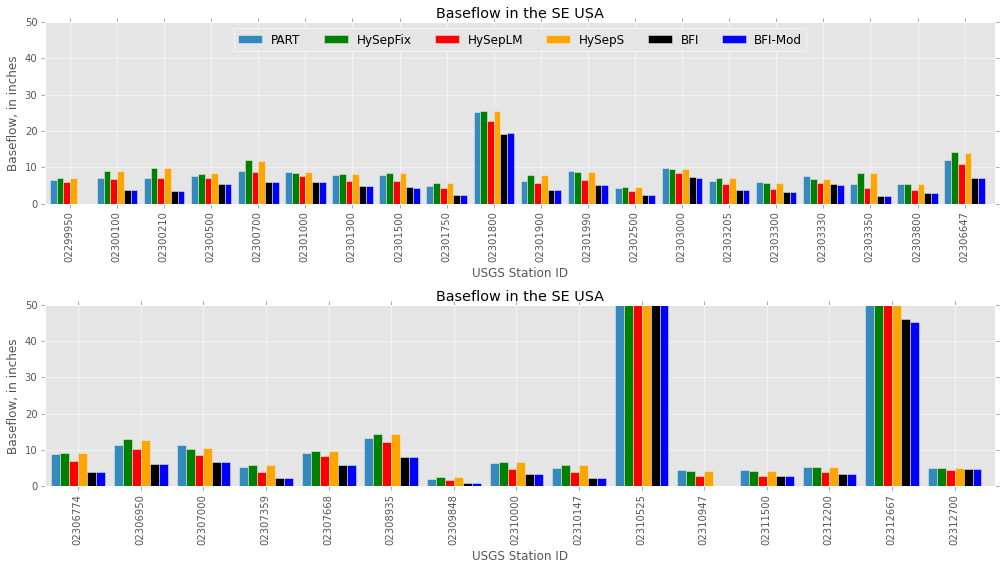

In [4]:
part_bfin = part[[x for x in part.columns.tolist() if 'BF_IN' in x][0]]
hysepfix_bfin = hysepfix[[x for x in hysepfix.columns.tolist() if 'BF_IN' in x][0]]
hyseplm_bfin = hyseplm[[x for x in hyseplm.columns.tolist() if 'BF_IN' in x][0]]
hyseps_bfin = hyseps[[x for x in hyseps.columns.tolist() if 'BF_IN' in x][0]]
bfi_bfin = bfi[[x for x in bfi.columns.tolist() if 'BF_IN' in x][0]]
bfim_bfin = bfim[[x for x in bfim.columns.tolist() if 'BF_IN' in x][0]]

nfigs = int(math.floor(len(df)/20.))+1
fig, axes = plt.subplots(nfigs, figsize=(14, 4*nfigs))
bar_width = 1/7.

i = 0
for idx, ax in enumerate(axes):
    x_pos = np.arange(0, len(df[i:i+20]))
    plt.sca(ax)
    plt.bar(x_pos-(bar_width)*2, part_bfin[i:i+20], bar_width, label='PART')
    plt.bar(x_pos-(bar_width), hysepfix_bfin[i:i+20], bar_width, label='HySepFix', color='g')
    plt.bar(x_pos, hyseplm_bfin[i:i+20], bar_width, label='HySepLM', color='r')
    plt.bar(x_pos+(bar_width), hyseps_bfin[i:i+20], bar_width, label='HySepS', color='orange')
    plt.bar(x_pos+(bar_width)*2, bfi_bfin[i:i+20], bar_width, label='BFI', color='black')
    plt.bar(x_pos+(bar_width)*3, bfim_bfin[i:i+20], bar_width, label='BFI-Mod', color='blue')

    plt.xlabel('USGS Station ID')
    plt.ylabel('Baseflow, in inches')
    plt.title('Baseflow in the SE USA')
    locs, labels = plt.xticks(x_pos + bar_width, df.index.tolist()[i:i+20])
    plt.setp(labels, rotation=90)

    plt.xlim(x_pos[0]-bar_width-.25, x_pos[-1]+(bar_width)*2+.5)
    plt.ylim(0, 50)

    if i==0:
        plt.legend(loc='upper center', ncol=6)
    plt.tight_layout()
    
    i += 20
    
plt.show()
fig.savefig('GWToolbox_baseflow_inches.png')



In [5]:
# Format baseflow results prior to computing statistics
methods_dict = OrderedDict([('PBF%', 'PART'),
                            ('HFBF%', 'HySEP-Fixed'),
                            ('HLMBF%', 'HySEP-LocMin'),
                            ('HSBF%', 'HySEP-Slide'),
                            ('BSBF%', 'BFIStandard'),
                            ('BMBF%', 'BFIModified')])

fmt = '{:>7.1%}'.format
formatter = {'Minimum': fmt,
             'Maximum': fmt,
             'Mean': fmt,
             'Median': fmt,
             'Std Dev': fmt}

# Pull out the data columns corresponding to percent-streamflow
pct_streamflow = df[[x for x in df.columns.tolist() if x.endswith('%') or x=='Type']]
pct_streamflow = pct_streamflow.rename(columns=methods_dict)
pct_streamflow[methods_dict.values()] = pct_streamflow[methods_dict.values()]/100.

# These designations of confinement refer to the degree of confinement of the FAS as set forth in Williams and Kuniansky (2015).
#   Confined: Upper confining unit generally is greater than 100ft thick and unbreached
#   Thinly Confined: Upper confining unit generally is less than 100 feet thick, breached, or both.
#   Unconfined: Upper confining unit and surficial aquifer are absent or very thin.
stat_column_names = ['Minimum', 'Maximum', 'Mean', 'Median', 'Std Dev']

f = open('GWToolbox_baseflow_stats.txt', 'w')

total = pct_streamflow[methods_dict.values()]
total_stats = pd.concat([total.min(), total.max(), total.mean(), total.median(), total.std()], axis=1)
total_stats.columns = stat_column_names
print 'All Sites ({})\n-------------'.format(len(df))
print total_stats.to_string(formatters=formatter)
f.write('All Sites ({})\n-------------\n'.format(len(df)))
f.write(total_stats.to_string(formatters=formatter))

confined = pct_streamflow[pct_streamflow.Type=='Confined'][methods_dict.values()]
confined_stats = pd.concat([confined.min(), confined.max(), confined.mean(), confined.median(), confined.std()], axis=1)
confined_stats.columns = stat_column_names
print '\n\nConfined ({})\n-------------'.format(len(confined))
print confined_stats.to_string(formatters=formatter)
f.write('\n\nConfined ({})\n-------------\n'.format(len(confined)))
f.write(confined_stats.to_string(formatters=formatter))

unconfined = pct_streamflow[pct_streamflow.Type=='Unconfined'][methods_dict.values()]
unconfined_stats = pd.concat([unconfined.min(), unconfined.max(), unconfined.mean(), unconfined.median(), unconfined.std()], axis=1)
unconfined_stats.columns = stat_column_names
print '\n\nUnconfined ({})\n-------------'.format(len(unconfined))
print unconfined_stats.to_string(formatters=formatter)
f.write('\n\nUnconfined ({})\n-------------\n'.format(len(unconfined)))
f.write(unconfined_stats.to_string(formatters=formatter))

thin = pct_streamflow[pct_streamflow.Type=='Thinly Confined'][methods_dict.values()]
thin_stats = pd.concat([thin.min(), thin.max(), thin.mean(), thin.median(), thin.std()], axis=1)
thin_stats.columns = stat_column_names
print '\n\nThinly Confined ({})\n-------------'.format(len(thin))
print thin_stats.to_string(formatters=formatter)
f.write('\n\nThinly Confined ({})\n-------------\n'.format(len(thin)))
f.write(thin_stats.to_string(formatters=formatter))

f.close()



All Sites (35)
-------------
             Minimum Maximum    Mean  Median Std Dev
PART           41.9%   99.8%   67.3%   64.7%   15.7%
HySEP-Fixed    45.6%   99.6%   71.6%   70.2%   11.5%
HySEP-LocMin   33.1%   99.7%   56.0%   52.7%   14.3%
HySEP-Slide    45.6%   99.6%   71.5%   69.9%   11.4%
BFIStandard    16.6%   99.7%   43.2%   38.1%   19.4%
BFIModified    16.6%   99.7%   42.9%   37.9%   19.3%


Confined (8)
-------------
             Minimum Maximum    Mean  Median Std Dev
PART           41.9%   69.7%   53.1%   50.4%    9.6%
HySEP-Fixed    45.6%   71.2%   61.3%   62.6%    8.4%
HySEP-LocMin   38.1%   56.0%   48.2%   48.8%    5.3%
HySEP-Slide    45.6%   71.2%   61.2%   62.2%    8.4%
BFIStandard    22.4%   44.3%   33.7%   32.5%    7.4%
BFIModified    22.3%   44.0%   33.5%   32.3%    7.3%


Unconfined (17)
-------------
             Minimum Maximum    Mean  Median Std Dev
PART           44.6%   99.8%   72.1%   73.6%   16.5%
HySEP-Fixed    56.8%   99.6%   75.8%   73.6%   11.9%
HySEP-Loc